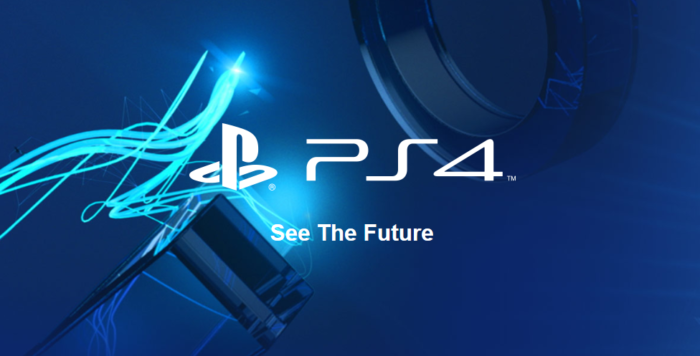
<h1><center>PS4 Games Analysis</center></h1>

In [1]:
# Import all required library and start reading csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import index_natsorted
%matplotlib inline

# You can type pd. and press tab to see available dataframe command
# To have more information about the command, press Shift + Tab button
df = pd.read_csv('./PS4_GamesSales.csv', encoding = "ISO-8859-1")

# rename few columns to make the data more understandable
df.rename(
    columns=({ 'North America': 'NA Sales', 'Europe': 'Eu Sales', 'Japan': 'Jp Sales', 'Global': 'Total Sales'}), 
    inplace=True,
)

df.head()

,Game,Year,Genre,Publisher,NA Sales,Eu Sales,Jp Sales,Rest of World,Total Sales
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


## Data Cleaning

**-** Remove the rows associated with nan values in Publisher column. When the Publisher value is null, the row data is not meaningful to use for this project.

In [2]:
# drop all row with null value for Publisher column
df = df.dropna(subset=['Publisher'])

# check if any null value in Publisher column
df['Publisher'].isnull().values.any()

False

## Publisher
Question 1 : Which publisher have publish most games for PS4 ?  

In [3]:
publisher_top_count = df.Publisher.value_counts()#Provide a pandas series of the counts for each Publisher

print(publisher_top_count[:1]) #Print out the publisher name which has publish most of PS4 games

Namco Bandai Games    56
Name: Publisher, dtype: int64


Question 2 : What is the top 5 of high earn publisher ?

Publisher
Activision                        72.44
Ubisoft                           59.16
Electronic Arts                   54.96
Sony Interactive Entertainment    54.85
EA Sports                         47.55
Name: Total Sales, dtype: float64


Text(0.5, 1.0, 'Top 5 High Earned PS4 Games Publisher')

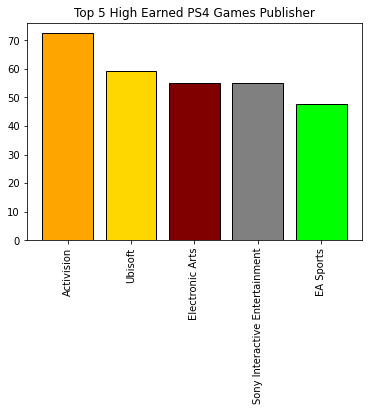

In [4]:
# calculate the Publisher earnings using groupby method
top_earn_publisher = df.groupby('Publisher')['Total Sales'].sum()
# find the top 5 publisher with highest earnings using nlargest method
status = top_earn_publisher.nlargest(5)

print (status)

# using data from status, create dataset and plot a graph 
height = [72.44, 59.16, 54.96, 54.85, 47.55]
bars = ('Activision', 'Ubisoft', 'Electronic Arts', 'Sony Interactive Entertainment', 'EA Sports')
x_pos = np.arange(len(bars))

plt.bar(x_pos, height, color=['orange', 'gold', 'maroon', 'gray', 'lime'], edgecolor='black')
plt.xticks(x_pos, bars, rotation=90)
plt.title("Top 5 High Earned PS4 Games Publisher")


## Sales
Question 1 : What is the average sales of top 10 selling games per year ?

In [5]:
# create a new series to store data of top 10 selling games and use assign method to apply lambda function to calculate
# the average sales per year
averageSales = df.assign(AverageSales = lambda x: x['Total Sales']/(2021 - x['Year']))
averageSales.head(10)

,Game,Year,Genre,Publisher,NA Sales,Eu Sales,Jp Sales,Rest of World,Total Sales,AverageSales
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,2.770000
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,2.515000
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,4.646667
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,3.350000
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,2.950000
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94,2.188000
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33,2.066000
7,Spider-Man (PS4),2018.0,Action-Adventure,Sony Interactive Entertainment,3.64,3.39,0.32,1.41,8.76,2.920000
8,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,3.11,3.83,0.19,1.36,8.48,1.696000
9,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.91,3.97,0.27,1.34,8.48,1.413333


Question 2 : Which PS4 game's genre score the highest sales ? And which country buy most of it ?

Genre
Action              136.82
Shooter             134.99
Sports               92.85
Role-Playing         62.73
Action-Adventure     61.86
Name: Total Sales, dtype: float64


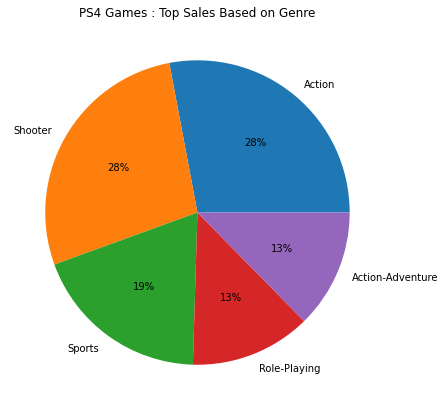

,Game,Year,Genre,Publisher,NA Sales,Eu Sales,Jp Sales,Rest of World,Total Sales
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33
17,God of War (PS4),2018.0,Action,Sony Interactive Entertainment,2.83,2.17,0.13,1.02,6.15
18,Horizon: Zero Dawn,2017.0,Action,Sony Interactive Entertainment,2.20,2.43,0.28,0.92,5.82
20,Uncharted: The Nathan Drake Collection,2015.0,Action,Sony Computer Entertainment,2.55,2.11,0.10,0.94,5.70


In [6]:
# calculate the sum of total sales for each Genre
top_genre_sales = df.groupby('Genre')['Total Sales'].sum()
# find the top 5 Genre with highest earnings using nlargest method
print(top_genre_sales.nlargest(5)) 

# plotting pie chart for better visualization of the data 
# using data from status, create dataset and plot a pie chart  
# Creating dataset
genre = ['Action', 'Shooter', 'Sports',
        'Role-Playing', 'Action-Adventure']
  
data = [136.85, 134.99, 92.85, 62.82, 61.86]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
# Showing the percentage at the pie chart 
plt.pie(data, labels = genre, autopct='%1.0f%%')
plt.title("PS4 Games : Top Sales Based on Genre")
  
# show plot
plt.show()

df.query('Genre=="Action"').head()

## Games

Question 1 : What are top 5 popular PS4 games published by Ubisoft ?

In [7]:
# query all the games published by Ubisoft
popular_games_ubisoft = df.query('Publisher == "Ubisoft"')
# print out the 5 most popular (based on total sales)
popular_games_ubisoft[:5]

,Game,Year,Genre,Publisher,NA Sales,Eu Sales,Jp Sales,Rest of World,Total Sales
27,Tom Clancy's The Division,2016.0,Shooter,Ubisoft,1.49,2.04,0.16,0.69,4.37
28,Tom Clancy's Rainbow Six: Siege,2015.0,Shooter,Ubisoft,1.29,2.06,0.36,0.64,4.36
29,Watch Dogs,2014.0,Action-Adventure,Ubisoft,1.40,2.13,0.11,0.68,4.32
31,Assassin's Creed: Unity,2014.0,Action,Ubisoft,1.25,2.16,0.09,0.65,4.14
34,Assassin's Creed Origins,2017.0,Action,Ubisoft,1.22,2.11,0.11,0.63,4.06
